In [22]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


📂 Copiando imágenes de /content/drive/MyDrive/Colab Notebooks/BASE DE DATOS SALUD/neumonia/chest_xray/train/NORMAL a Normal...
📂 Copiando imágenes de /content/drive/MyDrive/Colab Notebooks/BASE DE DATOS SALUD/neumonia/chest_xray/val/NORMAL a Normal...
📂 Copiando imágenes de /content/drive/MyDrive/Colab Notebooks/BASE DE DATOS SALUD/neumonia/chest_xray/test/NORMAL a Normal...
📂 Copiando imágenes de /content/drive/MyDrive/Colab Notebooks/BASE DE DATOS SALUD/neumonia/chest_xray/train/PNEUMONIA a Neumonia...
📂 Copiando imágenes de /content/drive/MyDrive/Colab Notebooks/BASE DE DATOS SALUD/neumonia/chest_xray/val/PNEUMONIA a Neumonia...
📂 Copiando imágenes de /content/drive/MyDrive/Colab Notebooks/BASE DE DATOS SALUD/neumonia/chest_xray/test/PNEUMONIA a Neumonia...
📂 Copiando imágenes de COVID-19...
Distribución de imágenes después de la fusión: {'Normal': 1583, 'Neumonia': 4273, 'COVID': 3616}


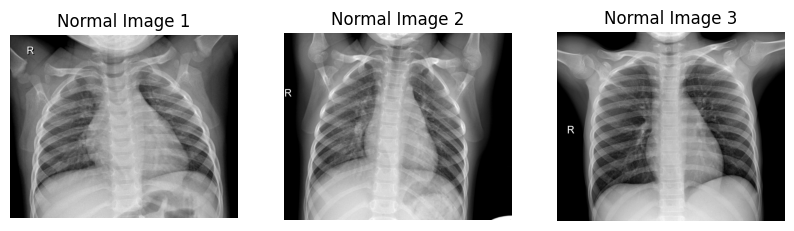

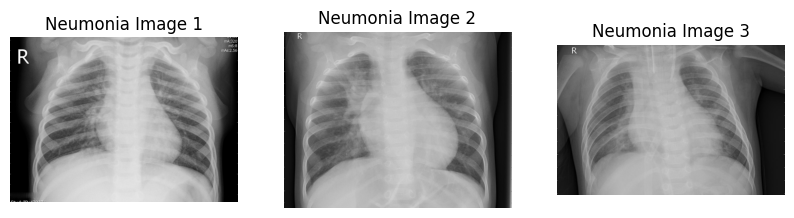

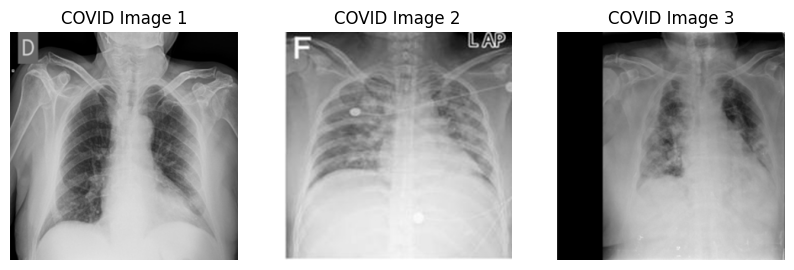

In [5]:
import os
import shutil
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Ruta base donde se encuentran las imágenes en Google Drive
dataset_pneumonia = "/content/drive/MyDrive/Colab Notebooks/BASE DE DATOS SALUD/neumonia/chest_xray"
dataset_covid = "/content/drive/MyDrive/Colab Notebooks/BASE DE DATOS SALUD/covid19/COVID-19_Radiography_Dataset/COVID"

# Nueva carpeta unificada para el dataset combinado
combined_dataset = "/content/combined_dataset"
os.makedirs(combined_dataset, exist_ok=True)

# Crear carpetas para las clases unificadas
classes = ["Normal", "Neumonia", "COVID"]
for cls in classes:
    os.makedirs(os.path.join(combined_dataset, cls), exist_ok=True)

# Función para mover imágenes a la nueva estructura
def move_images(source_path, category, target_category):
    for split in ["train", "val", "test"]:
        src_folder = os.path.join(source_path, split, category)
        if os.path.exists(src_folder):
            print(f"📂 Copiando imágenes de {src_folder} a {target_category}...")
            for img_name in os.listdir(src_folder):
                src_img_path = os.path.join(src_folder, img_name)
                dst_img_path = os.path.join(combined_dataset, target_category, img_name)
                shutil.copy(src_img_path, dst_img_path)
        else:
            print(f"⚠️ Advertencia: No se encontró la carpeta {src_folder}")

# Mover imágenes de Neumonía y Normal desde el dataset de Neumonía
move_images(dataset_pneumonia, "NORMAL", "Normal")
move_images(dataset_pneumonia, "PNEUMONIA", "Neumonia")

# Mover imágenes de COVID-19 desde el dataset de COVID
covid_images_path = os.path.join(dataset_covid, "images")
if os.path.exists(covid_images_path):
    print("📂 Copiando imágenes de COVID-19...")
    for img_name in os.listdir(covid_images_path):
        src_img_path = os.path.join(covid_images_path, img_name)
        dst_img_path = os.path.join(combined_dataset, "COVID", img_name)
        shutil.copy(src_img_path, dst_img_path)
else:
    print("⚠️ Advertencia: No se encontró la carpeta de imágenes de COVID")

# Contar imágenes en cada clase
image_counts = {cls: len(os.listdir(os.path.join(combined_dataset, cls))) for cls in classes}
print("Distribución de imágenes después de la fusión:", image_counts)

# Función para visualizar imágenes
def show_sample_images(base_path, category, num_samples=3):
    image_path = os.path.join(base_path, category)
    image_files = os.listdir(image_path)[:num_samples]

    plt.figure(figsize=(10, 5))
    for i, img_file in enumerate(image_files):
        img = load_img(os.path.join(image_path, img_file))
        img = img_to_array(img) / 255.0  # Normalizar entre 0 y 1

        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"{category} Image {i+1}")

    plt.show()

# Visualizar imágenes de ejemplo de cada clase
for cls in classes:
    show_sample_images(combined_dataset, cls, num_samples=3)

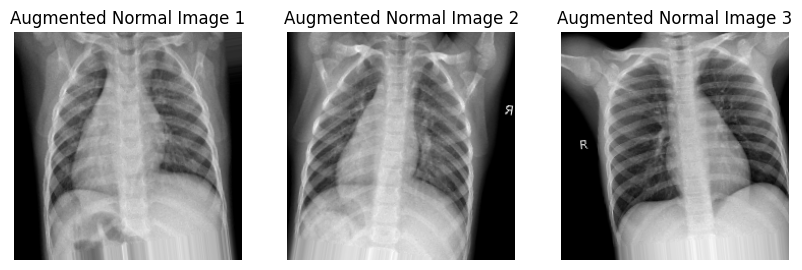

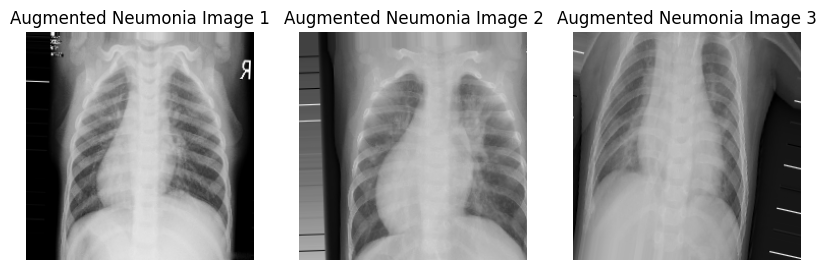

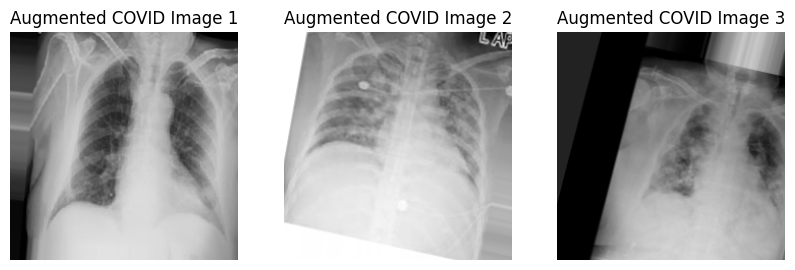

In [9]:
# Preprocesamiento de imágenes
import os
import shutil
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
IMG_SIZE = (224, 224)

def preprocess_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img = img_to_array(img) / 255.0  # Normalizar entre 0 y 1
    return img

# Aplicar aumento de datos
augmentation = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

def show_augmented_images(base_path, category, num_samples=3):
    image_path = os.path.join(base_path, category)
    image_files = os.listdir(image_path)[:num_samples]

    plt.figure(figsize=(10, 5))
    for i, img_file in enumerate(image_files):
        img = preprocess_image(os.path.join(image_path, img_file))
        img = np.expand_dims(img, axis=0)

        aug_iter = augmentation.flow(img, batch_size=1)
        aug_img = next(aug_iter)[0]

        plt.subplot(1, num_samples, i+1)
        plt.imshow(aug_img, cmap='gray')
        plt.axis('off')
        plt.title(f"Augmented {category} Image {i+1}")

    plt.show()

# Visualizar imágenes después del preprocesamiento
for cls in classes:
    show_augmented_images(combined_dataset, cls, num_samples=3)


Found 7579 images belonging to 3 classes.
Found 1893 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 617s 3s/step - accuracy: 0.7439 - loss: 0.6090 - val_accuracy: 0.9245 - val_loss: 0.2193
Epoch 2/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 617s 3s/step - accuracy: 0.9297 - loss: 0.1988 - val_accuracy: 0.9282 - val_loss: 0.1888
Epoch 3/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 648s 3s/step - accuracy: 0.9388 - loss: 0.1682 - val_accuracy: 0.9435 - val_loss: 0.1465
Epoch 4/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 617s 3s/step - accuracy: 0.9512 - loss: 0.1455 - val_accuracy: 0.9535 - val_loss: 0.1266
Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - accuracy: 0.9583 - loss: 0.1165 - val_accuracy: 0.9530 - val_loss: 0.1266
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - accuracy: 0.9653 - loss: 0.1035 - val_accuracy: 0.9435 - val_loss: 0.1499
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 653s 3s/step - accuracy: 0.9617 - loss: 0.1096 - val_accuracy: 0.9493 - val_loss: 0.1419
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 606s 3s/step - accuracy: 0.9702 - loss: 0.0865 - val_accu

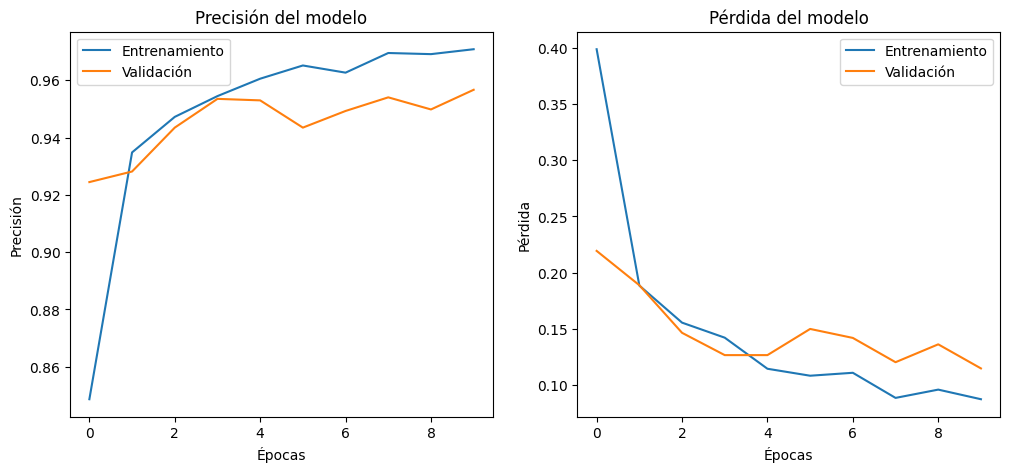

In [12]:
import os
import shutil
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Ruta base del dataset combinado
combined_dataset = "/content/combined_dataset"

# Parámetros del modelo
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# Generadores de imágenes para entrenamiento y validación
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    combined_dataset,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    combined_dataset,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Definir la arquitectura de la CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 clases: Normal, Neumonía, COVID
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Guardar el modelo entrenado
model.save("/content/cnn_lung_disease_model.h5")

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del modelo')

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida del modelo')

plt.show()


In [13]:
import os
import shutil
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ruta base del dataset combinado
combined_dataset = "/content/combined_dataset"

# Parámetros del modelo
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Generador de imágenes para datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    combined_dataset,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Cargar el modelo guardado
model = load_model("/content/cnn_lung_disease_model.h5")

# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Pérdida en test: {loss:.4f}")
print(f"Precisión en test: {accuracy:.4f}")

# Obtener predicciones
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generar reporte de clasificación
class_labels = list(test_generator.class_indices.keys())
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))



Found 9472 images belonging to 3 classes.


296/296 ━━━━━━━━━━━━━━━━━━━━ 214s 722ms/step - accuracy: 0.9907 - loss: 0.0311
Pérdida en test: 0.0679
Precisión en test: 0.9754
296/296 ━━━━━━━━━━━━━━━━━━━━ 211s 712ms/step
Reporte de Clasificación:
              precision    recall  f1-score   support

       COVID       0.99      1.00      0.99      3616
    Neumonia       0.97      0.98      0.97      4273
      Normal       0.97      0.91      0.94      1583

    accuracy                           0.98      9472
   macro avg       0.97      0.96      0.97      9472
weighted avg       0.98      0.98      0.98      9472



✅ Modelo cargado correctamente.
📷 Imagen seleccionada aleatoriamente de la clase real: Neumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


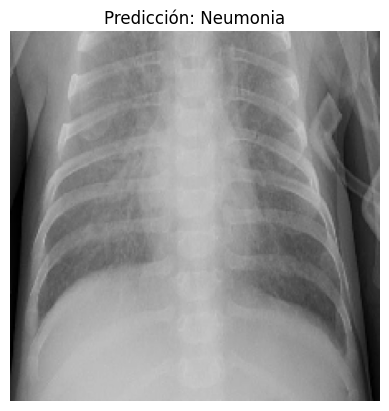

🔍 La imagen fue clasificada como: Neumonia


In [38]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Ruta del modelo entrenado
model_path = "/content/cnn_lung_disease_model.h5"

# Cargar el modelo
model = load_model(model_path)
print("✅ Modelo cargado correctamente.")

# Diccionario de clases
class_labels = ['Normal', 'Neumonia', 'COVID']

# Ruta del dataset combinado
combined_dataset = "/content/combined_dataset"

def get_random_image():
    category = random.choice(class_labels)  # Seleccionar una categoría aleatoria
    category_path = os.path.join(combined_dataset, category)

    if not os.path.exists(category_path) or len(os.listdir(category_path)) == 0:
        print(f"⚠️ No se encontraron imágenes en {category_path}")
        return None, None

    image_name = random.choice(os.listdir(category_path))  # Seleccionar una imagen aleatoria
    image_path = os.path.join(category_path, image_name)
    return image_path, category

# Función para hacer predicciones individuales
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalización
    img_array = np.expand_dims(img_array, axis=0)  # Expander dimensiones para la CNN

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Mostrar la imagen con la predicción
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Predicción: {predicted_label}")
    plt.show()

    return predicted_label

# Obtener una imagen aleatoria e intentar predecir
sample_image, real_class = get_random_image()
if sample_image:
    print(f"📷 Imagen seleccionada aleatoriamente de la clase real: {real_class}")
    predicted_label = predict_image(sample_image)
    print(f"🔍 La imagen fue clasificada como: {predicted_label}")
else:
    print("❌ No se pudo seleccionar una imagen.")

In [39]:
from google.colab import drive
drive.mount('/content/drive')

# Guardar el modelo en Drive
!cp /content/cnn_lung_disease_model.h5 /content/drive/MyDrive/
print("✅ Modelo guardado en Google Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Modelo guardado en Google Drive.


para no reentrenar el modelo y esperar 2 horas ejecutamos este codigo para cargar el modelo guardado

In [40]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model

# Cargar el modelo desde Drive
model_path = "/content/drive/MyDrive/cnn_lung_disease_model.h5"
model = load_model(model_path)
print("✅ Modelo cargado correctamente desde Google Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Modelo cargado correctamente desde Google Drive.
